<style>
/* Reveal container full viewport */
.reveal {
  width: 95vw !important; /* 95% of view width */
  height: 50vw !important;   /* about 16:9 aspect ratio height (width × 9/16) */
  max-width: 95vw !important;
  max-height: 50vw !important;
  margin: auto;
  font-size: 110%; /* global font size */
}

/* Slides filling container */
.reveal .slides {
  width: 100% !important;
  height: 100% !important;
  max-width: 100% !important;
  max-height: 100% !important;
  margin: auto;
  overflow-wrap: break-word;
}

/* Prevent content from overflowing horizontally */
.reveal section {
  overflow-x: auto;
  word-wrap: break-word;
  box-sizing: border-box;
  padding: 1em;
}

/* Tables scroll horizontally if too wide */
.reveal section table {
  display: block;
  overflow-x: auto;
  white-space: nowrap;
  max-width: 100%;
  margin: 0 auto;
  font-size: 90%;
  border-collapse: collapse;
}

/* Smaller font and compact padding inside table cells */
.reveal section table td,
.reveal section table th {
  font-size: 90%;
  padding: 0.3em 0.5em;
  white-space: nowrap;
}
</style>

# Third Hands-On Session
---
Exploring periodic lattices:

- Implementing and studying the properties of a FODO cell/lattice
- Computing closed optics solutions
- The concept of Tune and FODO cell phase advance
- Introducing Sector Bends
---

## 🐍 Python corner

Let's import standard packages and settings. We'll be using:
- `numpy` as `np`
- `matplotlib.pyplot` as `plt`
- `from ipywidgets import interactive`
- functions `D`, `Q`, `transportParticles`, `getEquivalentElement`

In [2]:
# Import custom tracking functions and useful libraries
from tracking_library import *

numpy is installed, version: 2.3.1
scipy is installed, version: 1.15.3
matplotlib is installed, version: 3.10.0
-> Setup is OK! Have fun!


## ⚛️ Physics focus: From arbitrary transport to periodic transport

From the previous lecture we know that any beam line can be described by a transfer matrix M. In a periodic system (e.g. an accelerator ring), the beam passes through the same structure repeatedly, so after m turns:
\begin{equation}
X_m = M \cdot M \cdot ... \cdot M X_0 = M^m X_0
\end{equation}
where M is the transfer matrix of one full period, also called **the One-Turn Map (OTM)**. 

For the motion to be stable over many turns, the particle trajectory must remain bounded:
\begin{equation}
|X_m| < |\hat{X}| \qquad  \forall \quad X_0, m
\end{equation}
For a 2x2 real symplectic matrix (such as M), this stability condition translates into a simple requirement on the trace:
\begin{equation}
\frac{1}{2}|Tr(M)|\leq1
\end{equation}

**In the following, we will study particle motion and stability using one of the most common periodic structures: the FODO cell!**


## 📝 Exercise 3.1 (guided): Stability of the FODO cell

The FODO cell is one of the most fundamental lattice topologies. In its simpler version, it consists on two thin quadrupoles of opposite focal length, f, spaced by two drifts of length $L$ (as in [Wolfgan's lecture](https://indico.cern.ch/event/1356988/contributions/5713241/)), i.e. the total length of the cell ($L_{FODO}$) is $2L$. 

<p align="center">
<img src=./_img_exercises/slide_fodo.png width="60%">
</p>

1. Define a **FODO beamline** that **starts and ends in the middle of a focusing quadrupole** (we could start the FODO from an arbitrary point inside it). For the moment, we can define arbitrarily the $f$ and $L$ parameters: we chose **2.5 m and 1 m**, respectively.

> 👀 **HINT 1**: A half-quadrupole has double the focal length than a full quadrupole.

> 👀 **HINT 2**: To better visualize the trajectory of the particle(s), always split the drifts in several shorter drifts (e.g. $10$ drifts, each $L/10$ long).
    
2. Track a particle that has an initial offset $x = 1$ mm and no angle $x' = -0.1$ mrad, and plot its position $x$ and angle $x'$ along the beam line.

> 👀 **HINT 3**: After having plotted $x$ trajectory on a plot, one can create a second vertical axis that shares the same horizontal axis with `plt.twinx()`

3. Plot the position $x$ and angle $x'$ through $N=100$ equal FODO cells.

4. Play with different values of the focal length $f$ and explore whether you can make the oscillations grow.

> 👀 **HINT 4**: Look back at [Wolfgan's lecture](https://indico.cern.ch/event/1356988/contributions/5713241/): the stability of a FODO cell takes the form:
> \begin{equation}
    \frac{1}{2}|Tr(M)| = \left|\frac{L}{2f}\right| = \left|\frac{L_{FODO}}{4f}\right| \leq 1
   \end{equation}

### Solution for 1. 

In [3]:
f = 2.5
L = 1
beamline = Q(2 * f) + 10 * D(L / 10) + Q(-f) + 10 * D(L / 10) + Q(2 * f)

### Solution for 2.

(-0.5, 0.5)

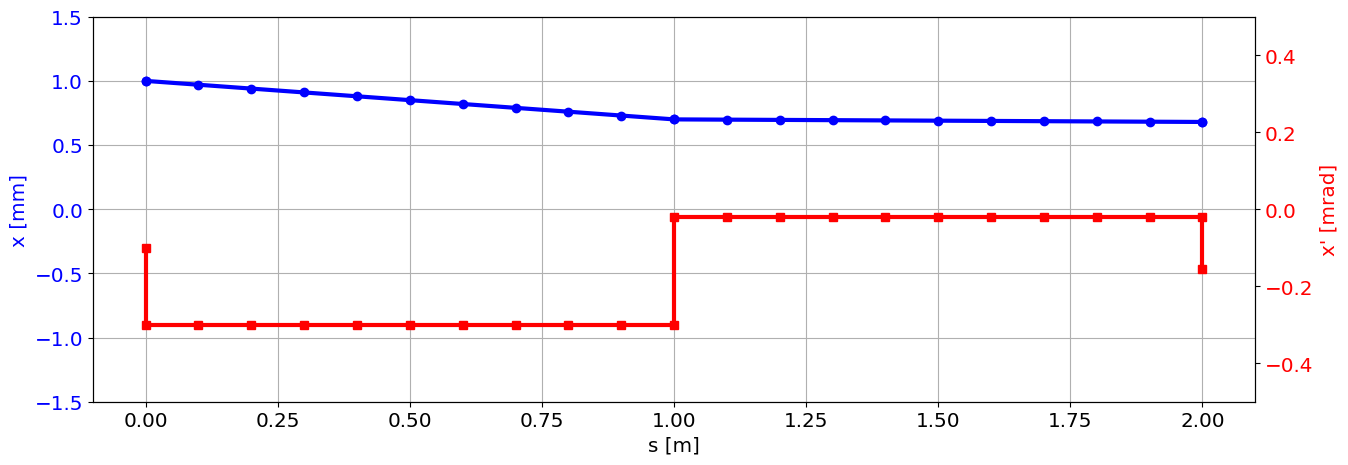

In [4]:
X_0 = np.array([ [1], 
                 [-0.1] ])

# do tracking
transported_particles = transportParticles(X_0, beamline)

# plotting
plt.plot(transported_particles["s"], transported_particles["x"], "o-b", lw=3)
plt.grid(True)
plt.xlabel("s [m]")
plt.ylabel("x [mm]", color="b")
plt.tick_params(axis="y", labelcolor="b")
plt.ylim([-1.5, 1.5])

ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
plt.tick_params(axis="y", labelcolor="r")
plt.plot(transported_particles["s"], transported_particles["xp"], "s-r", lw=3)
plt.ylabel("x' [mrad]", color="r")
plt.ylim([-0.5, 0.5])

### Solution for 3. 

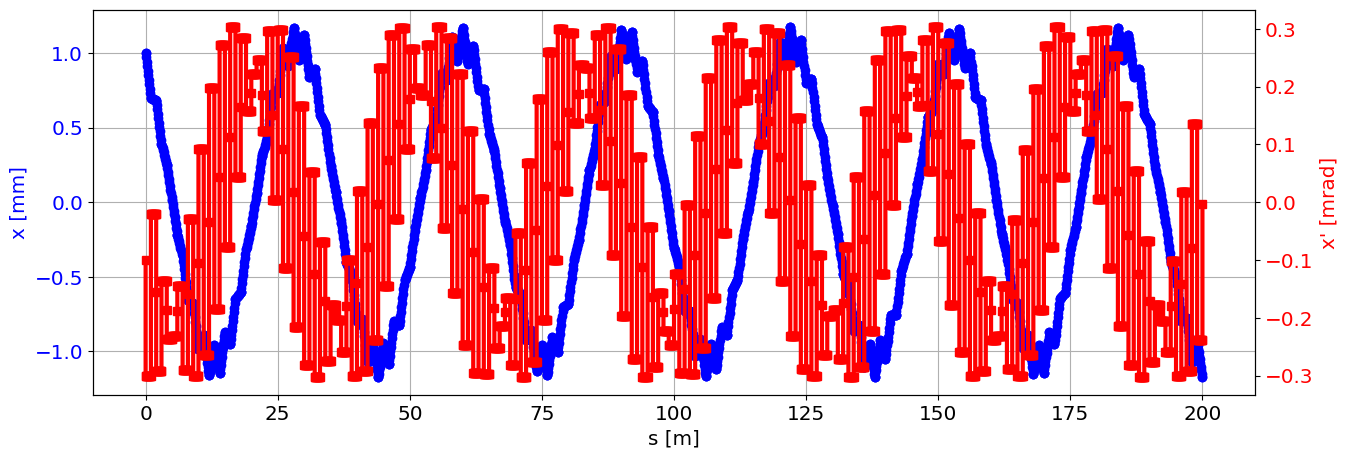

In [5]:
transported_particles = transportParticles(X_0, 100 * beamline)

plt.plot(transported_particles["s"], transported_particles["x"], "o-b", lw=3)
plt.grid(True)
plt.xlabel("s [m]")
plt.ylabel("x [mm]", color="b")
plt.tick_params(axis="y", labelcolor="b")

# instantiate a second axes that shares the same x-axis
ax2 = plt.twinx()
plt.ylabel("x' [mrad]", color="r")
plt.tick_params(axis="y", labelcolor="r")
plt.plot(transported_particles["s"], transported_particles["xp"], "s-r", lw=3)

### Solution for 4. 

In [6]:
# Check stability interactively
def plot_function(f, L):
    # prepare the tracking
    beamline = Q(2 * f) + 10 * D(L / 10) + Q(-f) + 10 * D(L / 10) + Q(2 * f)
    X = np.array([[1], [-0.1]])
    transported_particles = transportParticles(X_0, 100 * beamline)

    plt.plot(transported_particles["s"], transported_particles["x"], "o-b", lw=3)
    plt.grid(True)
    plt.xlabel("s [m]")
    plt.ylabel("x [mm]", color="b")
    plt.tick_params(axis="y", labelcolor="b")
    ax2 = plt.twinx()
    plt.ylabel("x' [mrad]", color="r")
    plt.tick_params(axis="y", labelcolor="r")
    plt.plot(transported_particles["s"], transported_particles["xp"], "s-r", lw=3)

interactive_plot = interactive(plot_function, f=(0.1, 30, 0.01), L=(0, 2, 0.1), continuous_update=True)
output = interactive_plot.children[-1]
output.layout.height = "500px"
interactive_plot

interactive(children=(FloatSlider(value=15.05, description='f', max=30.0, min=0.1, step=0.01), FloatSlider(val…

## 📝 Exercise 3.2: Transport of sigma matrix in a FODO beamline & searching periodic solution

1. Transport a sigma matrix (e.g. $\beta$ = 3 [m], $\gamma$ = 0.5 [1/m], $\epsilon$ = 1 [mm mrad]) through a beamline made of 8 FODO cells (with, for example, $f=2.5$ and $L=1$ as before), and plot the evolution of the sigma matrix elements ($\sigma_{11}$, $\sigma_{22}$, $\sigma_{12}$) along the beamline. Do you see a periodic structure?

2. Try to vary the initial sigma matrix parameter by **try and error** that reproduces itself at the end of the beam line (8 FODO cells), meaning:

   \begin{equation}
      \Sigma_{0} = M_{\mathrm{OTM}} \Sigma_0 M_{\mathrm{OTM}}^T
   \end{equation}
    You will quickly realise that this is extremely difficult if not impossible. 
    > 👀 **HINT 1**: (optional) you might want to use an **interactive plot** - see in the previous exercise how to make one

In [ ]:
# code here your solution...

## ⚛️ Physics focus: Periodic solution (matching)

For a **stable lattice**, there must exist a **periodic solution**. In other words, there are Twiss parameters such that the beam matrix reproduces itself after one turn:

\begin{equation}
  \Sigma_{0} = M_{\mathrm{OTM}} \Sigma_0 M_{\mathrm{OTM}}^T
\end{equation}

Using the Twiss parametrization, the periodic solution is (**recall** [Wolfgan's lecture](https://indico.cern.ch/event/1356988/contributions/5713241/)):

\begin{equation}
    M_{\mathrm{OTM}} = 
        \left[
        \begin{array}{cc}
        \cos(\mu) + \alpha_0 \sin(\mu)  & \beta_0 \sin(\mu)\\
        - \gamma_0 \sin(\mu) & \cos(\mu) - \alpha_0 \sin(\mu)
        \end{array}
        \right]
        =
        \left[
        \begin{array}{cc}
        r_{11}  & r_{12} \\
        r_{21}  & r_{22}
        \end{array}
        \right]
\end{equation}

Here, $\alpha_0$, $\beta_0$, and $\gamma_0$ are the Twiss parameters at the start (or equivalently the end) of the lattice, and $\mu$ is the **phase advance**. The total phase advance around the ring, divided by $2\pi$, is called the **tune**.

The important point is that the existence of **these periodic Twiss parameters is a property of the lattice itself**: they depend only on its focusing structure (e.g. quadrupole strength $f$, drift length $L$), not on the initial beam distribution.

Of course, in practice one can inject a mismatched beam, meaning **a beam whose Twiss parameters do not coincide with the periodic solution of the lattice**. In this case the motion remains stable, but the beam size and particle oscillations can vary significantly along the lattice and from turn to turn.

## 📝 Exercise 3.3: Periodic solution of a FODO cell

Remember [Wolfgan's lecture](https://indico.cern.ch/event/1356988/contributions/5713241/) for finding the periodic solution:

<p align="center">
<img src=./_img_exercises/slide_fodo_periodic.png width="60%">
</p>

Note that at the middle of the quadrupoles of a FODO cell alpha=0. 

1. Get the one turn matrix (using the `getEquivalentElement` function) of a FODO cell (that starts at the middle of the focusing quadrupole) and extract the periodic solution based on the analytical expressions above.
2. Plot the evolution of the Twiss parameters over the FODO cell by transporting the sigma matrix with an emittance of 1 mm mrad

In [ ]:
# code here your solution...

### 🔹 **NOTE** Those concepts are implemented in the function `twiss()` from our toolbox:

In [ ]:
from tracking_library import twiss

help(twiss)

> 🔹 **NOTE**: We can apply this function to any beamline, e.g. a series of quadrupoles and drifts, e.g.:

In [ ]:
# create a random beamline of many elements
beamline = 5 * (10 * D(0.5 / 10) + Q(1) + 10 * D(2 / 10) + Q(-0.8) + 10 * D(1.5 / 10) + Q(0.3) + 10 * D(1.5 / 10))

# compute the closed solution
(tune, beta, alpha, gamma) = twiss(beamline)
print(tune, beta, alpha, gamma)

# assemble the sigma matrix
epsilon = 1
sigma_matrix = np.array([ [beta, -alpha], 
                          [-alpha, gamma]]) * epsilon

# print out the values
print(f"The total phase advance (or tune) of the beamline is {tune}.")
print(f"The sigma matrix is:\n {sigma_matrix}")
print(f"which has determinant equal to: {np.linalg.det(sigma_matrix):.3f}.")

## 📝 Exercise 3.4: Tuning FODO phase advance

The Twiss parameters and the phase advanced can be 'tuned' by changing the focusing and length of our FODO cell. Look back at [Wolfgan's lecture](https://indico.cern.ch/event/1356988/contributions/5713241/) and see that (with some math), one can prove that:

\begin{equation}
       \sin(\mu/2) = \frac{L_{FODO}}{4f}
\end{equation}

Consider a single FODO cell of total length $L_{FODO}=2$ m. **Can you find $f$ such that the FODO cell phase advance is $\mu = \pi/2$, i.e. 90 deg phase-advance?**

> Optional/guided: Introduce **sector bends** ($L_{bend} = L/2 = 0.5$ m, and bending angle $\phi=10$ degrees) in the middle of both drifts of the FODO cell, without changing the total length of the FODO cell. How does the optics change?

> 👀 **HINT**: Our toolbox library implements also sector bends: `B(phi, L)` defined by bending angle (`phi`) and bend lenght (`L`).

In [1]:
# code here your solution...

> 🔹 **NOTE:** the optics has changed, so the tune. Why? Extra-focusing from sector bends...

> 🔹 **NOTE:** for more complicated cells than a simple FODO cell, there exist numerical methods for tuning (changing the tune, beta function, ...) the lattice (e.g. [match](https://xsuite.readthedocs.io/en/latest/match.html) of Xsuite)

## 📝 Exercise 3.5: Putting it all together — tuning an accelerator ring and tracking a beam

1. **Build your accelerator** 
   - Construct a synchrotron of total length 160 m, composed of 16 FODO cells (ignore dipoles; start at the center of a focusing quadrupole).  
   - Determine the quadrupole strength required to obtain a phase advance of 60.12 degrees per cell.  
   - Compute the one-turn matrix (OTM) of the synchrotron and verify that the lattice is stable.  
   - Find the Twiss parameters of the periodic solution and calculate the tune. Check that the phase advance per cell is indeed close to 60 degrees.
2. **Generate a matched Gaussian beam and plot beta function**  
   - Using the Twiss parameters from step 1 and an emittance of **1 mm·mrad**, compute the **sigma matrix** and the corresponding beam size.
   - Compute the beta function along the ring by tracking the sigma matrix.   
   - Generate **4000 particles** with $<x_0>$ = 0, $<x'_0>$ = 0, and second moments given by the sigma matrix (i.e. $\sigma_{xx}$, $\sigma_{x'x'}$, $\sigma_{xx'}$).  
   - Plot the **initial phase space distribution** of the particles.
3. **Track the beam for one turn**  
   - Track all 500 particles for **one turn**.  
   - In a single figure, plot:  
     - all particle trajectories (black),  
     - the trajectory of the first particle (orange),  
     - and the mean trajectory of the beam (blue).
4. **Track a single particle - betatron oscillations, tune and single particle ellipse** 
   - Select a single particle with a chosen $(x_0, x'_0)$ and track it for **100 turns** (use a loop).  
   - Plot its trajectory and its trace space evolution turn by turn.
   - Optional: use interactive plotting for varying the number of turns  

In [ ]:
# code here your solution...

In [ ]:
# code here your solution...

In [ ]:
# code here your solution...

In [ ]:
# code here your solution...

In [ ]:
# code here your solution...

In [ ]:
# code here your solution...

In [ ]:
# code here your solution...

In [ ]:
# code here your solution...

### 🔹 **NOTE:** the particles turn-by-turn perform betatron oscillations. The tune tells us how many oscillations a partcle performs during one revolution. 

### 🔹 **NOTE:** in the trace space, the particle motion follows a close loop (ellipse).

### **🔹 NOTE:** the orientation of this ellipse depends on the Twiss parameters of the lattice. 

<p align="center">
<img src=./_img_exercises/ellipse.png width="70%">
</p>

## Well done !!

=> **If you still have time, continue your learning with the following [notebook](./04_Dispersion.ipynb)**...
